# Test the Model

In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install zip_files

In [3]:
!pip install keras==2.2.4
!pip tensorflow==2.7

     |████████████████████████████████| 312 kB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 11.8 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
ERROR: unknown command "tensorflow==2.7"


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


DATA  AUGMENTATION

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TTu7zgUU50hVTQU7yZBJLWEcdIJccOJ8DGGnDgTct61s',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-4bk6tdrqjspglc'
object_key = 'DATA SET.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile 
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [8]:
pwd

'/home/wsuser/work'

In [9]:
import os
filenames = os.listdir('/home/wsuser/work/Dataset/training_set')

In [10]:
x_train=train_datagen.flow_from_directory('/home/wsuser/work/Dataset/training_set',
                                          target_size=(64,64),batch_size=100,class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


test_set

In [11]:
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test_set", 
                                          target_size=(64,64),batch_size=100,class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


Train

In [12]:
len(x_train)

158

Test

In [13]:
len(x_test)

23

Train class

In [14]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D, Flatten

#Creating the model

In [16]:
model=Sequential()

Adding Convolution Layer

In [17]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

Adding Pooling Layer

In [18]:
model.add(MaxPooling2D(pool_size=(2,2)))

Adding Flatten Layer

In [19]:
model.add(Flatten())

Adding Dense Layer

In [20]:
model.add(Dense(300,activation='relu'))
model.add(Dense(512,activation='relu'))

Adding Output Layer

In [21]:
model.add(Dense(9, activation='softmax'))

Compile the Model

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit and Save model

In [23]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
30/30 [==============================] - 13s 411ms/step - loss: 0.9435 - accuracy: 0.6680 - val_loss: 0.4316 - val_accuracy: 0.8876
Epoch 2/10
30/30 [==============================] - 9s 306ms/step - loss: 0.2680 - accuracy: 0.9129
Epoch 3/10
30/30 [==============================] - 9s 291ms/step - loss: 0.1498 - accuracy: 0.9580
Epoch 4/10
30/30 [==============================] - 9s 297ms/step - loss: 0.1027 - accuracy: 0.9675
Epoch 5/10
30/30 [==============================] - 9s 298ms/step - loss: 0.0689 - accuracy: 0.9797
Epoch 6/10
30/30 [==============================] - 9s 292ms/step - loss: 0.0602 - accuracy: 0.9810
Epoch 7/10
30/30 [==============================] - 9s 283ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 8/10
30/30 [==============================] - 9s 287ms/step - loss: 0.0369 - accuracy: 0.9890
Epoch 9/10
30/30 [==============================] - 8s 273ms/step - loss: 0.0342 - accuracy: 0.9903
Epoch 10/10
30/30 [==============================] - 9s 2

Save Model

In [24]:
model.save('Model.h5')

In [25]:
!tar -zcvf Real-TimeCommunication.tgz Model.h5

Model.h5


In [26]:
ls -l

total 208888
drwxrwx--- 4 wsuser wscommon      4096 Nov 15 10:33 Dataset/
-rw-rw---- 1 wsuser wscommon 112667280 Nov 15 10:37 Model.h5
-rw-rw---- 1 wsuser wscommon 101227365 Nov 15 10:37 Real-TimeCommunication.tgz


In [27]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.0 MB/s eta 0:00:01


In [28]:
from ibm_watson_machine_learning import APIClient
wml_credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey" : "fkIkh3mzDhHMZ0V0sNgtt6uS-XISXwws4m3hVqNBeq3F"
}
client = APIClient(wml_credentials)

In [29]:
client = APIClient(wml_credentials)

In [30]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [31]:
space_uid = guid_from_space_name(client, 'Real-Time Communication System Powered by AI for Specially Abled')
print("space UID =" + space_uid)

space UID =ac92e9e5-4e22-4e47-935c-9da5714447f8


In [32]:
client.set.default_space(space_uid)

'SUCCESS'

In [33]:
client.software_specifications.list(300)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [34]:
!pip install tensorflow==1.14.0


ERROR: Could not find a version that satisfies the requirement tensorflow==1.14.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2)
ERROR: No matching distribution found for tensorflow==1.14.0


In [35]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [36]:
model_details = client.repository.store_model(model= 'Real-TimeCommunication.tgz',meta_props
                                             ={client.repository.ModelMetaNames.NAME:"CNN",
                                               client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
                                               client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
                                            )
                                            
model_id = client.repository.get_model_uid(model_details)

Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=ac92e9e5-4e22-4e47-935c-9da5714447f8)
Status code: 400, body: {
  "trace": "9d957409fcf9fae4a194be1a64b444d0",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported software specification 'tensorflow_1.15-py3.6'.",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}


ApiRequestFailure: Failure during creating model. (POST https://us-south.ml.cloud.ibm.com/ml/v4/models?version=2021-06-24&space_id=ac92e9e5-4e22-4e47-935c-9da5714447f8)
Status code: 400, body: {
  "trace": "9d957409fcf9fae4a194be1a64b444d0",
  "errors": [{
    "code": "invalid_request_entity",
    "message": "Invalid request entity: Unsupported software specification 'tensorflow_1.15-py3.6'.",
    "more_info": "https://cloud.ibm.com/apidocs/machine-learning"
  }],
  "status_code": "400"
}

In [38]:
model_details=client.repository.store_model(model="Dataset.tgz",meta_props={
client.repository.ModelMetaNames.NAME: "CNN Model Building",
client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

Failure during getting trained models details. (GET https://us-south.ml.cloud.ibm.com/ml/v4/trainings/Dataset.tgz?version=2021-06-24&space_id=ac92e9e5-4e22-4e47-935c-9da5714447f8)
Status code: 404, body: {"trace":"c606c3411438fbf5a50235769d9528d9","errors":[{"code":"training_job_run_not_found","message":"Backend persistence error (404): GET request failed","more_info":"http://watson-ml-api.mybluemix.net/"}],"status_code":"404"}
Unexpected type of 'model parameter', expected: model path / training_id, actual: 'Dataset.tgz'.


UnexpectedType: Unexpected type of 'model parameter', expected: model path / training_id, actual: 'Dataset.tgz'.

In [39]:
model_id

NameError: name 'model_id' is not defined

In [41]:
model.save('Model.h5')

In [42]:
model_id=client.repository.get_model_id(model_details)

NameError: name 'model_details' is not defined

In [ ]:
model_id

# TEST THE MODEL

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

Load Model

In [41]:
model = load_model('Model.h5')

Load Image

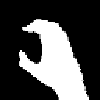

In [59]:
img = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/C/50.png',
                     target_size = (100,100))
img

In [53]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

Detect Image Letter

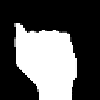

In [77]:
imgA = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/A/50.png',
                     target_size = (100,100))
imgA

In [78]:
imgA=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/A/50.png")
detect(imgA)

1/1 [==============================] - 0s 28ms/step
THE PREDICTED LETTER IS  A


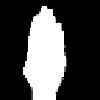

In [79]:
imgB = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/B/50.png',
                     target_size = (100,100))
imgB

In [80]:
imgB=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/B/50.png")
detect(imgB)

1/1 [==============================] - 0s 36ms/step
THE PREDICTED LETTER IS  B


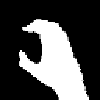

In [81]:
imgC = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/C/50.png',
                     target_size = (100,100))
imgC

In [82]:
imgC=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/C/50.png")
detect(imgC)

1/1 [==============================] - 0s 47ms/step
THE PREDICTED LETTER IS  C


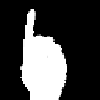

In [83]:
imgD = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/D/50.png',
                     target_size = (100,100))
imgD

In [84]:
imgD=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/D/50.png")
detect(imgD)

1/1 [==============================] - 0s 32ms/step
THE PREDICTED LETTER IS  D


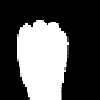

In [85]:
imgE = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/E/50.png',
                     target_size = (100,100))
imgE

In [86]:
imgE=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/E/50.png")
detect(imgE)

1/1 [==============================] - 0s 29ms/step
THE PREDICTED LETTER IS  E


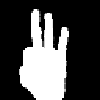

In [87]:
imgF = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/F/50.png',
                     target_size = (100,100))
imgF

In [88]:
imgF=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/F/50.png")
detect(imgF)

1/1 [==============================] - 0s 33ms/step
THE PREDICTED LETTER IS  F


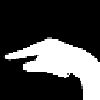

In [89]:
imgG= image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/G/50.png',
                     target_size = (100,100))
imgG

In [90]:
imgG=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/G/50.png")
detect(imgG)

1/1 [==============================] - 0s 46ms/step
THE PREDICTED LETTER IS  G


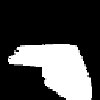

In [91]:
imgH = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/H/50.png',
                     target_size = (100,100))
imgH

In [94]:
imgH=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/H/50.png")
detect(imgH)

1/1 [==============================] - 0s 35ms/step
THE PREDICTED LETTER IS  I
